# Initial Set-Up Work:

In [1]:
# Basic imports are listed here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reads the primary dataset and displays its head.
primary_df = pd.read_csv("LeagueofLegends.csv")
primary_df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


# Data Preprocessing:

## Data Cleanup:

In [3]:
# The initial shape of the dataframe, before any preprocessing is perofrmed, is shown here.
print(primary_df.shape)

(7620, 57)


In [4]:
# Removes unnecessary columns from the primary dataset. The shape of the updated datatfame is shown afterwards to ensure columns were successfully dropped.
primary_df.drop(['League', 'Season', 'Type', 'blueTeamTag', 'goldblueTop', 'goldblueJungle', 'goldblueMiddle', 
         'goldblueADC', 'goldblueSupport', 'redTop', 'goldredTop', 'redJungle', 'goldredJungle', 
         'redMiddle', 'goldredMiddle', 'redADC', 'goldredADC', 'redSupport', 'goldredSupport', 'redTeamTag', 
         'blueTop', 'blueMiddle', 'blueJungle', 'blueADC', 'blueSupport', 'golddiff', 'goldblue', 'bTowers', 
         'bInhibs', 'bDragons', 'bBarons','bHeralds', 'goldred', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 
         'rHeralds', 'blueBans', 'redBans', 'bKills', 'rKills'], axis=1, inplace=True)
print(primary_df.shape)

(7620, 15)


In [5]:
# Checks for any null values in the primary dataset.
primary_df.isnull().sum()

Year                0
bResult             0
rResult             0
gamelength          0
blueTopChamp        0
blueJungleChamp     0
blueMiddleChamp     0
blueADCChamp        0
blueSupportChamp    0
redTopChamp         0
redJungleChamp      0
redMiddleChamp      0
redADCChamp         0
redSupportChamp     0
Address             0
dtype: int64

In [6]:
# Provides basic descriptive statistics about the match length.
primary_df.describe()['gamelength']

count    7620.000000
mean       37.012598
std         7.983238
min        17.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        95.000000
Name: gamelength, dtype: float64

In [7]:
# Creates a function to identify outliers after being provided a dataframe and a specific column name.
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    outliers = df[((df[col] < (q1 - 1.5*IQR)) | (df[col] > (q3 + 1.5*IQR)))]
    return outliers

# Abnormally long or short matches are found and temporarily stored in a variable.
gamelength_outliers = find_outliers(primary_df, 'gamelength').index
workable_outliers = primary_df.loc[gamelength_outliers]
print(gamelength_outliers)

Int64Index([ 165,  175,  181,  243,  248,  298,  314,  318,  338,  345,
            ...
            7240, 7261, 7297, 7430, 7438, 7439, 7447, 7515, 7551, 7570],
           dtype='int64', length=164)


In [8]:
# Removes matches identified as outliers (based on game length) from the primary dataframe. The shape of the updated dataframe is shown afterwards to ensure removals have succeeded.
primary_df = primary_df.drop(gamelength_outliers)
print(primary_df.shape)
primary_df.describe()

(7456, 15)


,Year,bResult,rResult,gamelength
count,7456.000000,7456.000000,7456.000000,7456.000000
mean,2016.282591,0.543723,0.456277,36.458423
std,0.847736,0.498118,0.498118,7.078681
min,2014.000000,0.000000,0.000000,17.000000
25%,2016.000000,0.000000,0.000000,31.000000
50%,2016.000000,1.000000,0.000000,36.000000
75%,2017.000000,1.000000,1.000000,41.000000
max,2018.000000,1.000000,1.000000,56.000000


In [9]:
primary_df = primary_df.sort_values(by = 'Address')
primary_df.head()

,Year,bResult,rResult,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,Address
4357,2017,1,0,34,Renekton,JarvanIV,Galio,Xayah,Taric,Shen,Gragas,Corki,Tristana,Lulu,http://matchhistory.br.leagueoflegends.com/pt/...
4359,2017,0,1,45,Renekton,Gragas,Galio,Varus,Rakan,Chogath,JarvanIV,Malzahar,Xayah,Alistar,http://matchhistory.br.leagueoflegends.com/pt/...
4360,2017,1,0,42,JarvanIV,Sejuani,Syndra,Xayah,Rakan,Camille,Gragas,Taliyah,Kalista,Morgana,http://matchhistory.br.leagueoflegends.com/pt/...
4361,2017,0,1,27,JarvanIV,Sejuani,Lucian,Xayah,Shen,Poppy,Elise,Cassiopeia,Tristana,Braum,http://matchhistory.br.leagueoflegends.com/pt/...
4363,2017,1,0,37,JarvanIV,RekSai,Taliyah,Twitch,Braum,Chogath,Gragas,Lucian,Varus,Lulu,http://matchhistory.br.leagueoflegends.com/pt/...


In [10]:
# Reads the kills dataset and displays its head.
kills_df = pd.read_csv("kills.csv")
kills_df.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


In [11]:
# Groups the kills dataset by address and team, and counts the number of kills said team has accumulatd in total.
kills = kills_df.groupby(["Address", "Team"]).size().reset_index(name = "Kills")
kills.head()

,Address,Team,Kills
0,http://matchhistory.br.leagueoflegends.com/pt/...,bKills,6
1,http://matchhistory.br.leagueoflegends.com/pt/...,rKills,1
2,http://matchhistory.br.leagueoflegends.com/pt/...,bKills,22
3,http://matchhistory.br.leagueoflegends.com/pt/...,rKills,19
4,http://matchhistory.br.leagueoflegends.com/pt/...,bKills,11


In [12]:
# Separates the kills for each uniquue match by blue team's kills and red team's kills.
bKills = kills[kills['Team'] == 'bKills']
rKills = kills[kills['Team'] == 'rKills']

In [13]:
# Creates a bKills column in the primary dataset that matches the each unique match.
for row in bKills.index:
    addr = bKills.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bKills'] = bKills.loc[row, 'Kills']

print(primary_df[['Address', 'bKills']])

                                                Address  bKills
4357  http://matchhistory.br.leagueoflegends.com/pt/...     6.0
4359  http://matchhistory.br.leagueoflegends.com/pt/...    22.0
4360  http://matchhistory.br.leagueoflegends.com/pt/...    11.0
4361  http://matchhistory.br.leagueoflegends.com/pt/...     3.0
4363  http://matchhistory.br.leagueoflegends.com/pt/...    28.0
...                                                 ...     ...
7563  https://matchhistory.na.leagueoflegends.com/en...    16.0
7564  https://matchhistory.na.leagueoflegends.com/en...     9.0
7565  https://matchhistory.na.leagueoflegends.com/en...    13.0
7566  https://matchhistory.na.leagueoflegends.com/en...     2.0
7567  https://matchhistory.na.leagueoflegends.com/en...    11.0

[7456 rows x 2 columns]


In [14]:
# Creates a rKills column in the primary dataset that matches the each unique match.
for row in rKills.index:
    addr = rKills.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rKills'] = rKills.loc[row, 'Kills']
    
print(primary_df[['Address', 'bKills', 'rKills']])

                                                Address  bKills  rKills
4357  http://matchhistory.br.leagueoflegends.com/pt/...     6.0     1.0
4359  http://matchhistory.br.leagueoflegends.com/pt/...    22.0    19.0
4360  http://matchhistory.br.leagueoflegends.com/pt/...    11.0     9.0
4361  http://matchhistory.br.leagueoflegends.com/pt/...     3.0    15.0
4363  http://matchhistory.br.leagueoflegends.com/pt/...    28.0    18.0
...                                                 ...     ...     ...
7563  https://matchhistory.na.leagueoflegends.com/en...    16.0     4.0
7564  https://matchhistory.na.leagueoflegends.com/en...     9.0    10.0
7565  https://matchhistory.na.leagueoflegends.com/en...    13.0     1.0
7566  https://matchhistory.na.leagueoflegends.com/en...     2.0    14.0
7567  https://matchhistory.na.leagueoflegends.com/en...    11.0     7.0

[7456 rows x 3 columns]


In [15]:
# Separates the deaths for each uniquue match by blue team's deaths and red team's deaths.
primary_df['bDeaths'] = primary_df['rKills']
primary_df['rDeaths'] = primary_df['bKills']

In [16]:
# Reads the gold dataset and displays all of its columns.
gold = pd.read_csv("gold.csv")
gold.columns

Index(['Address', 'Type', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5', 'min_6',
       'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13',
       'min_14', 'min_15', 'min_16', 'min_17', 'min_18', 'min_19', 'min_20',
       'min_21', 'min_22', 'min_23', 'min_24', 'min_25', 'min_26', 'min_27',
       'min_28', 'min_29', 'min_30', 'min_31', 'min_32', 'min_33', 'min_34',
       'min_35', 'min_36', 'min_37', 'min_38', 'min_39', 'min_40', 'min_41',
       'min_42', 'min_43', 'min_44', 'min_45', 'min_46', 'min_47', 'min_48',
       'min_49', 'min_50', 'min_51', 'min_52', 'min_53', 'min_54', 'min_55',
       'min_56', 'min_57', 'min_58', 'min_59', 'min_60', 'min_61', 'min_62',
       'min_63', 'min_64', 'min_65', 'min_66', 'min_67', 'min_68', 'min_69',
       'min_70', 'min_71', 'min_72', 'min_73', 'min_74', 'min_75', 'min_76',
       'min_77', 'min_78', 'min_79', 'min_80', 'min_81', 'min_82', 'min_83',
       'min_84', 'min_85', 'min_86', 'min_87', 'min_88', 'min_89', 'min_90',

In [17]:
# Drops all rows that are not of 'golddiff' type.
for row in workable_outliers.index:
    addr = workable_outliers.loc[row, 'Address']
    gold = gold.drop(gold[gold['Address'] == addr].index)
gold = gold.drop(gold[gold['Type'] != 'golddiff'].index)

In [18]:
# Sorts the gold dataframe by address for future merging.
gold = gold.sort_values(by = 'Address')
gold.head()

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_86,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95
4357,http://matchhistory.br.leagueoflegends.com/pt/...,golddiff,0,0,0,169,42,45,232,-182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4359,http://matchhistory.br.leagueoflegends.com/pt/...,golddiff,0,0,107,-386,-796,-822,-885,-1082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4360,http://matchhistory.br.leagueoflegends.com/pt/...,golddiff,0,0,-17,-55,-81,21,744,428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4361,http://matchhistory.br.leagueoflegends.com/pt/...,golddiff,0,0,-7,-145,-326,-278,-628,-1024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4363,http://matchhistory.br.leagueoflegends.com/pt/...,golddiff,0,0,11,103,-230,-249,-775,-325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Defines new columns in the primary dataframe using the gold dataframe's columns. 
primary_df['gd15min'] = gold['min_15']
primary_df['gd30min'] = gold['min_30']
primary_df['gd45min'] = gold['min_45']
primary_df['gd56min'] = gold['min_56']

In [20]:
# Imputes the row mean as the value for NaN values in each row.
primary_df.fillna(primary_df.mean(), inplace=True)
print(primary_df[['gd15min', 'gd30min', 'gd45min', 'gd56min']])

      gd15min       gd30min      gd45min      gd56min
4357     2123  10332.000000  -228.962136 -1043.236842
4359     -201   3142.000000 -8096.000000 -1043.236842
4360     -320  -1354.000000  -228.962136 -1043.236842
4361    -2846    461.475884  -228.962136 -1043.236842
4363     1196   6421.000000  -228.962136 -1043.236842
...       ...           ...          ...          ...
7563    -1031    461.475884  -228.962136 -1043.236842
7564      545    311.000000  -228.962136 -1043.236842
7565     4128  14634.000000  -228.962136 -1043.236842
7566     1146  -2538.000000  -228.962136 -1043.236842
7567     1899   6886.000000  -228.962136 -1043.236842

[7456 rows x 4 columns]


C:\Users\johnw\AppData\Local\Temp\ipykernel_18832\1668389989.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  primary_df.fillna(primary_df.mean(), inplace=True)


## Useful Dataframes to Use Later, Created Here

In [21]:
# Creates a dataframe storing blue team compositions and their match results.
blue_team_composition_df = primary_df.filter(["Address","blueTopChamp","blueMiddleChamp", "blueADCChamp", "blueSupportChamp", "blueJungleChamp", "bResult"])
blue_team_composition_df.head()

,Address,blueTopChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueJungleChamp,bResult
4357,http://matchhistory.br.leagueoflegends.com/pt/...,Renekton,Galio,Xayah,Taric,JarvanIV,1
4359,http://matchhistory.br.leagueoflegends.com/pt/...,Renekton,Galio,Varus,Rakan,Gragas,0
4360,http://matchhistory.br.leagueoflegends.com/pt/...,JarvanIV,Syndra,Xayah,Rakan,Sejuani,1
4361,http://matchhistory.br.leagueoflegends.com/pt/...,JarvanIV,Lucian,Xayah,Shen,Sejuani,0
4363,http://matchhistory.br.leagueoflegends.com/pt/...,JarvanIV,Taliyah,Twitch,Braum,RekSai,1


In [22]:
# Creates a dataframe storing red team compositions and their match results.
red_team_composition_df = primary_df.filter(["Address","redTopChamp","redMiddleChamp", "redADCChamp", "redSupportChamp", "redJungleChamp", "rResult"])
red_team_composition_df.head()

,Address,redTopChamp,redMiddleChamp,redADCChamp,redSupportChamp,redJungleChamp,rResult
4357,http://matchhistory.br.leagueoflegends.com/pt/...,Shen,Corki,Tristana,Lulu,Gragas,0
4359,http://matchhistory.br.leagueoflegends.com/pt/...,Chogath,Malzahar,Xayah,Alistar,JarvanIV,1
4360,http://matchhistory.br.leagueoflegends.com/pt/...,Camille,Taliyah,Kalista,Morgana,Gragas,0
4361,http://matchhistory.br.leagueoflegends.com/pt/...,Poppy,Cassiopeia,Tristana,Braum,Elise,1
4363,http://matchhistory.br.leagueoflegends.com/pt/...,Chogath,Lucian,Varus,Lulu,Gragas,0


In [23]:
# Reads the bans dataset and drops the 4th and 5th bans columns. The head is then displayed.
bans_df = pd.read_csv("bans.csv")
bans_df.drop(["ban_4", "ban_5"], axis=1, inplace=True)
bans_df.head()

,Address,Team,ban_1,ban_2,ban_3
0,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Rumble,Kassadin,Lissandra
1,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Kassadin,Sivir,Lissandra
2,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,JarvanIV,Lissandra,Kassadin
3,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Annie,Lissandra,Kassadin
4,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Irelia,Pantheon,Kassadin


In [24]:
# Creates a dataframe out of blue team's bans for each unique match address.
blue_team_bans_df = bans_df[bans_df["Team"] == "blueBans"]
blue_team_bans_df.drop("Team", axis=1, inplace=True)
blue_team_bans_df.rename(columns = {'ban_1':'b_ban1','ban_2':'b_ban2','ban_3':'b_ban3'}, inplace = True)
blue_team_bans_df.head()

C:\Users\johnw\AppData\Local\Temp\ipykernel_18832\1638197146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_team_bans_df.drop("Team", axis=1, inplace=True)
C:\Users\johnw\AppData\Local\Temp\ipykernel_18832\1638197146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_team_bans_df.rename(columns = {'ban_1':'b_ban1','ban_2':'b_ban2','ban_3':'b_ban3'}, inplace = True)


,Address,b_ban1,b_ban2,b_ban3
0,http://matchhistory.na.leagueoflegends.com/en/...,Rumble,Kassadin,Lissandra
1,http://matchhistory.na.leagueoflegends.com/en/...,Kassadin,Sivir,Lissandra
2,http://matchhistory.na.leagueoflegends.com/en/...,JarvanIV,Lissandra,Kassadin
3,http://matchhistory.na.leagueoflegends.com/en/...,Annie,Lissandra,Kassadin
4,http://matchhistory.na.leagueoflegends.com/en/...,Irelia,Pantheon,Kassadin


In [25]:
# Creates a dataframe out of red team's bans for each unique match address.
red_team_bans_df = bans_df[bans_df["Team"] == "redBans"]
red_team_bans_df.drop("Team", axis=1, inplace=True)
red_team_bans_df.rename(columns = {'ban_1':'r_ban1','ban_2':'r_ban2','ban_3':'r_ban3',}, inplace = True)
red_team_bans_df.head()

C:\Users\johnw\AppData\Local\Temp\ipykernel_18832\1432190511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_team_bans_df.drop("Team", axis=1, inplace=True)
C:\Users\johnw\AppData\Local\Temp\ipykernel_18832\1432190511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_team_bans_df.rename(columns = {'ban_1':'r_ban1','ban_2':'r_ban2','ban_3':'r_ban3',}, inplace = True)


,Address,r_ban1,r_ban2,r_ban3
7620,http://matchhistory.na.leagueoflegends.com/en/...,Tristana,Leblanc,Nidalee
7621,http://matchhistory.na.leagueoflegends.com/en/...,RekSai,Janna,Leblanc
7622,http://matchhistory.na.leagueoflegends.com/en/...,Leblanc,Zed,RekSai
7623,http://matchhistory.na.leagueoflegends.com/en/...,RekSai,Rumble,LeeSin
7624,http://matchhistory.na.leagueoflegends.com/en/...,Rumble,Sivir,Rengar


In [26]:
# Reads the monster objectives dataset and displays its head.
monsters_df = pd.read_csv("monsters.csv")
monsters_df.head()

,Address,Team,Time,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON


In [27]:
# Creates a new dataframe to hold all of the ORIGINAL DRAGONS killed in all matches.
original_dragons_df = monsters_df[monsters_df["Type"] == "DRAGON"]

# Creates a new dataframe to hold all of the FIRST ORIGINAL DRAGONS killed in each UNIQUE match.
original_first_drags_df = original_dragons_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
original_first_drags_df.head()

,Address,Team,Time,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,11.699,DRAGON
1,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,11.945,DRAGON
2,http://matchhistory.br.leagueoflegends.com/pt/...,rDragons,11.455,DRAGON
3,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,16.793,DRAGON
4,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,9.968,DRAGON


In [28]:
# Creates a new dataframe to hold all of the ELEMENTAL DRAGONS killed in all matches.
elemental_dragons_df = monsters_df[monsters_df["Type"].isin(["AIR_DRAGON", "EARTH_DRAGON", "FIRE_DRAGON", "WATER_DRAGON"])]

# Creates a new dataframe to hold all of the FIRST ELEMENTAL DRAGONS killed in each UNIQUE match.
elemental_first_drags_df = elemental_dragons_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
elemental_first_drags_df.head()

,Address,Team,Time,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,12.891,AIR_DRAGON
1,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,9.765,FIRE_DRAGON
2,http://matchhistory.br.leagueoflegends.com/pt/...,rDragons,12.247,EARTH_DRAGON
3,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,13.968,WATER_DRAGON
4,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,9.723,WATER_DRAGON


In [29]:
# Creates a new dataframe to hold all of the ELDER DRAGONS killed in all matches.
elder_dragons_df = monsters_df[monsters_df["Type"] == "ELDER_DRAGON"]

# Creates a new dataframe to hold all of the FIRST ELDER DRAGONS killed in each UNIQUE match.
elder_first_drags_df = elder_dragons_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
elder_first_drags_df.head()

,Address,Team,Time,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,rDragons,40.035,ELDER_DRAGON
1,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,38.675,ELDER_DRAGON
2,http://matchhistory.br.leagueoflegends.com/pt/...,bDragons,39.989,ELDER_DRAGON
3,http://matchhistory.br.leagueoflegends.com/pt/...,rDragons,37.842,ELDER_DRAGON
4,http://matchhistory.br.leagueoflegends.com/pt/...,rDragons,38.281,ELDER_DRAGON


In [30]:
# Creates a new dataframe to hold all of the RIFT HERALDS killed in all matches.
rift_heralds_df = monsters_df[monsters_df["Type"] == "RIFT_HERALD"]

# Creates a new dataframe to hold all of the FIRST RIFT HERALDS killed in each UNIQUE match.
first_rift_heralds_df = rift_heralds_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
first_rift_heralds_df.head()

,Address,Team,Time,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,bHeralds,10.337,RIFT_HERALD
1,http://matchhistory.br.leagueoflegends.com/pt/...,bHeralds,14.026,RIFT_HERALD
2,http://matchhistory.br.leagueoflegends.com/pt/...,rHeralds,16.743,RIFT_HERALD
3,http://matchhistory.br.leagueoflegends.com/pt/...,rHeralds,13.880,RIFT_HERALD
4,http://matchhistory.br.leagueoflegends.com/pt/...,bHeralds,13.065,RIFT_HERALD


In [31]:
# Creates a new dataframe to hold all of the BARON NASHORS killed in all matches.
baron_nashors_df = monsters_df[monsters_df["Type"] == "BARON_NASHOR"]

# Creates a new dataframe to hold all of the FIRST BARON NASHORS killed in each UNIQUE match.
first_baron_nashors_df = baron_nashors_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
first_baron_nashors_df.head()

,Address,Team,Time,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,bBarons,22.512,BARON_NASHOR
1,http://matchhistory.br.leagueoflegends.com/pt/...,bBarons,27.565,BARON_NASHOR
2,http://matchhistory.br.leagueoflegends.com/pt/...,bBarons,30.886,BARON_NASHOR
3,http://matchhistory.br.leagueoflegends.com/pt/...,rBarons,23.487,BARON_NASHOR
4,http://matchhistory.br.leagueoflegends.com/pt/...,bBarons,28.578,BARON_NASHOR


In [32]:
# Reads the structures dataset and displays its head.
structures_df = pd.read_csv("structures.csv")
structures_df = structures_df.dropna()
structures_df.head()

,Address,Team,Time,Lane,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542,MID_LANE,BASE_TURRET
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269,MID_LANE,NEXUS_TURRET
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583,BOT_LANE,INNER_TURRET
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,TOP_LANE,INNER_TURRET
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556,BOT_LANE,OUTER_TURRET


In [33]:
# Creates a new dataframe to hold all of the OUTER TURRETS destroyed in all matches.
outer_turrets_df = structures_df[structures_df["Type"] == "OUTER_TURRET"]

# Creates a new dataframe to hold all of the FIRST OUTER TURRETS destroyed in each UNIQUE match.
first_outer_turrets_df = outer_turrets_df.sort_values(by=["Time"]).groupby("Address").first().reset_index()
first_outer_turrets_df.head()

,Address,Team,Time,Lane,Type
0,http://matchhistory.br.leagueoflegends.com/pt/...,bTowers,9.397,TOP_LANE,OUTER_TURRET
1,http://matchhistory.br.leagueoflegends.com/pt/...,bTowers,8.670,BOT_LANE,OUTER_TURRET
2,http://matchhistory.br.leagueoflegends.com/pt/...,rTowers,9.075,MID_LANE,OUTER_TURRET
3,http://matchhistory.br.leagueoflegends.com/pt/...,rTowers,9.340,MID_LANE,OUTER_TURRET
4,http://matchhistory.br.leagueoflegends.com/pt/...,rTowers,13.053,BOT_LANE,OUTER_TURRET


In [34]:
# Final state of the primary dataframe, after simple columns are added.
primary_df

,Year,bResult,rResult,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,...,redSupportChamp,Address,bKills,rKills,bDeaths,rDeaths,gd15min,gd30min,gd45min,gd56min
4357,2017,1,0,34,Renekton,JarvanIV,Galio,Xayah,Taric,Shen,...,Lulu,http://matchhistory.br.leagueoflegends.com/pt/...,6.0,1.0,1.0,6.0,2123,10332.000000,-228.962136,-1043.236842
4359,2017,0,1,45,Renekton,Gragas,Galio,Varus,Rakan,Chogath,...,Alistar,http://matchhistory.br.leagueoflegends.com/pt/...,22.0,19.0,19.0,22.0,-201,3142.000000,-8096.000000,-1043.236842
4360,2017,1,0,42,JarvanIV,Sejuani,Syndra,Xayah,Rakan,Camille,...,Morgana,http://matchhistory.br.leagueoflegends.com/pt/...,11.0,9.0,9.0,11.0,-320,-1354.000000,-228.962136,-1043.236842
4361,2017,0,1,27,JarvanIV,Sejuani,Lucian,Xayah,Shen,Poppy,...,Braum,http://matchhistory.br.leagueoflegends.com/pt/...,3.0,15.0,15.0,3.0,-2846,461.475884,-228.962136,-1043.236842
4363,2017,1,0,37,JarvanIV,RekSai,Taliyah,Twitch,Braum,Chogath,...,Lulu,http://matchhistory.br.leagueoflegends.com/pt/...,28.0,18.0,18.0,28.0,1196,6421.000000,-228.962136,-1043.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,2018,1,0,28,Gangplank,Nidalee,Zoe,Kalista,Taric,Gnar,...,TahmKench,https://matchhistory.na.leagueoflegends.com/en...,16.0,4.0,4.0,16.0,-1031,461.475884,-228.962136,-1043.236842
7564,2018,1,0,43,Gnar,JarvanIV,Karma,KogMaw,Janna,Vladimir,...,Braum,https://matchhistory.na.leagueoflegends.com/en...,9.0,10.0,10.0,9.0,545,311.000000,-228.962136,-1043.236842
7565,2018,1,0,31,Ornn,Nidalee,Karma,Varus,Janna,Gnar,...,Braum,https://matchhistory.na.leagueoflegends.com/en...,13.0,1.0,1.0,13.0,4128,14634.000000,-228.962136,-1043.236842
7566,2018,0,1,42,Gnar,LeeSin,Azir,Ezreal,Nami,Ornn,...,TahmKench,https://matchhistory.na.leagueoflegends.com/en...,2.0,14.0,14.0,2.0,1146,-2538.000000,-228.962136,-1043.236842


In [35]:
primary_df['bTotal_Objectives'] = 0
primary_df['rTotal_Objectives'] = 0

In [36]:
TObjectives = first_outer_turrets_df.groupby(["Address", "Team"]).size().reset_index(name = "Towers")
ODObjectives = original_first_drags_df.groupby(["Address", "Team"]).size().reset_index(name = "Dragons")
EDObjectives = elemental_first_drags_df.groupby(["Address", "Team"]).size().reset_index(name = "Dragons")
ELObjectives = elder_first_drags_df.groupby(["Address", "Team"]).size().reset_index(name = "Dragons")
HObjectives = first_rift_heralds_df.groupby(["Address", "Team"]).size().reset_index(name = "Heralds")
BObjectives = first_baron_nashors_df.groupby(["Address", "Team"]).size().reset_index(name = "Barons")
print(TObjectives)

                                                Address     Team  Towers
0     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
1     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
2     http://matchhistory.br.leagueoflegends.com/pt/...  rTowers       1
3     http://matchhistory.br.leagueoflegends.com/pt/...  rTowers       1
4     http://matchhistory.br.leagueoflegends.com/pt/...  rTowers       1
...                                                 ...      ...     ...
7615  https://matchhistory.na.leagueoflegends.com/en...  rTowers       1
7616  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7617  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7618  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7619  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1

[7620 rows x 3 columns]


In [37]:
bTObjectives = TObjectives[TObjectives['Team'] == 'bTowers']
rTObjectives = TObjectives[TObjectives['Team'] == 'rTowers']
bODObjectives = ODObjectives[ODObjectives['Team'] == 'bDragons']
rODObjectives = ODObjectives[ODObjectives['Team'] == 'rDragons']
bEDObjectives = EDObjectives[EDObjectives['Team'] == 'bDragons']
rEDObjectives = EDObjectives[EDObjectives['Team'] == 'rDragons']
bELObjectives = ELObjectives[ELObjectives['Team'] == 'bDragons']
rELObjectives = ELObjectives[ELObjectives['Team'] == 'rDragons']
bHObjectives = HObjectives[HObjectives['Team'] == 'bHeralds']
rHObjectives = HObjectives[HObjectives['Team'] == 'rHeralds']
bBObjectives = BObjectives[BObjectives['Team'] == 'bBarons']
rBObjectives = BObjectives[BObjectives['Team'] == 'rBarons']
print(bTObjectives)

                                                Address     Team  Towers
0     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
1     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
6     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
8     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
9     http://matchhistory.br.leagueoflegends.com/pt/...  bTowers       1
...                                                 ...      ...     ...
7614  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7616  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7617  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7618  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1
7619  https://matchhistory.na.leagueoflegends.com/en...  bTowers       1

[4161 rows x 3 columns]


In [38]:
for row in bTObjectives.index:
    addr = bTObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bTObjectives.loc[row, 'Towers']
for row in bODObjectives.index:
    addr = bODObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bODObjectives.loc[row, 'Dragons']
for row in bEDObjectives.index:
    addr = bEDObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bEDObjectives.loc[row, 'Dragons']
for row in bELObjectives.index:
    addr = bELObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bELObjectives.loc[row, 'Dragons']
for row in bHObjectives.index:
    addr = bHObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bHObjectives.loc[row, 'Heralds']
for row in bBObjectives.index:
    addr = bBObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'bTotal_Objectives'] += bBObjectives.loc[row, 'Barons']
print(primary_df[['Address', 'bTotal_Objectives']])

                                                Address  bTotal_Objectives
4357  http://matchhistory.br.leagueoflegends.com/pt/...                  4
4359  http://matchhistory.br.leagueoflegends.com/pt/...                  4
4360  http://matchhistory.br.leagueoflegends.com/pt/...                  2
4361  http://matchhistory.br.leagueoflegends.com/pt/...                  1
4363  http://matchhistory.br.leagueoflegends.com/pt/...                  3
...                                                 ...                ...
7563  https://matchhistory.na.leagueoflegends.com/en...                  2
7564  https://matchhistory.na.leagueoflegends.com/en...                  3
7565  https://matchhistory.na.leagueoflegends.com/en...                  3
7566  https://matchhistory.na.leagueoflegends.com/en...                  1
7567  https://matchhistory.na.leagueoflegends.com/en...                  4

[7456 rows x 2 columns]


In [39]:
for row in rTObjectives.index:
    addr = rTObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rTObjectives.loc[row, 'Towers']
for row in rODObjectives.index:
    addr = rODObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rODObjectives.loc[row, 'Dragons']
for row in rEDObjectives.index:
    addr = rEDObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rEDObjectives.loc[row, 'Dragons']
for row in rELObjectives.index:
    addr = rELObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rELObjectives.loc[row, 'Dragons']
for row in rHObjectives.index:
    addr = rHObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rHObjectives.loc[row, 'Heralds']
for row in rBObjectives.index:
    addr = rBObjectives.loc[row, 'Address']
    primary_df.loc[(primary_df['Address'] == addr), 'rTotal_Objectives'] += rBObjectives.loc[row, 'Barons']
print(primary_df[['Address', 'rTotal_Objectives']])

                                                Address  rTotal_Objectives
4357  http://matchhistory.br.leagueoflegends.com/pt/...                  0
4359  http://matchhistory.br.leagueoflegends.com/pt/...                  1
4360  http://matchhistory.br.leagueoflegends.com/pt/...                  3
4361  http://matchhistory.br.leagueoflegends.com/pt/...                  3
4363  http://matchhistory.br.leagueoflegends.com/pt/...                  1
...                                                 ...                ...
7563  https://matchhistory.na.leagueoflegends.com/en...                  1
7564  https://matchhistory.na.leagueoflegends.com/en...                  1
7565  https://matchhistory.na.leagueoflegends.com/en...                  0
7566  https://matchhistory.na.leagueoflegends.com/en...                  3
7567  https://matchhistory.na.leagueoflegends.com/en...                  0

[7456 rows x 2 columns]


In [40]:
primary_df[['bTotal_Objectives', 'rTotal_Objectives']].describe()

,bTotal_Objectives,rTotal_Objectives
count,7456.000000,7456.000000
mean,1.851931,1.736186
std,1.239444,1.238228
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,5.000000,5.000000


In [41]:
final_primary_df = primary_df.reindex(columns = ['Address', 'Year', 'bResult', 'rResult', 'gamelength', 'blueTopChamp', 
                                                 'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'redTopChamp', 
                                                 'redJungleChamp', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp', 'bKills', 
                                                 'bDeaths', 'bTotal_Objectives', 'rKills',  'rDeaths', 'rTotal_Objectives', 
                                                 'gd15min', 'gd30min', 'gd45min', 'gd56min'])
final_primary_df.columns

Index(['Address', 'Year', 'bResult', 'rResult', 'gamelength', 'blueTopChamp',
       'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp',
       'blueSupportChamp', 'redTopChamp', 'redJungleChamp', 'redMiddleChamp',
       'redADCChamp', 'redSupportChamp', 'bKills', 'bDeaths',
       'bTotal_Objectives', 'rKills', 'rDeaths', 'rTotal_Objectives',
       'gd15min', 'gd30min', 'gd45min', 'gd56min'],
      dtype='object')

## Basic Data Visualizations:

<AxesSubplot:title={'center':'Game Length'}, ylabel='Frequency'>

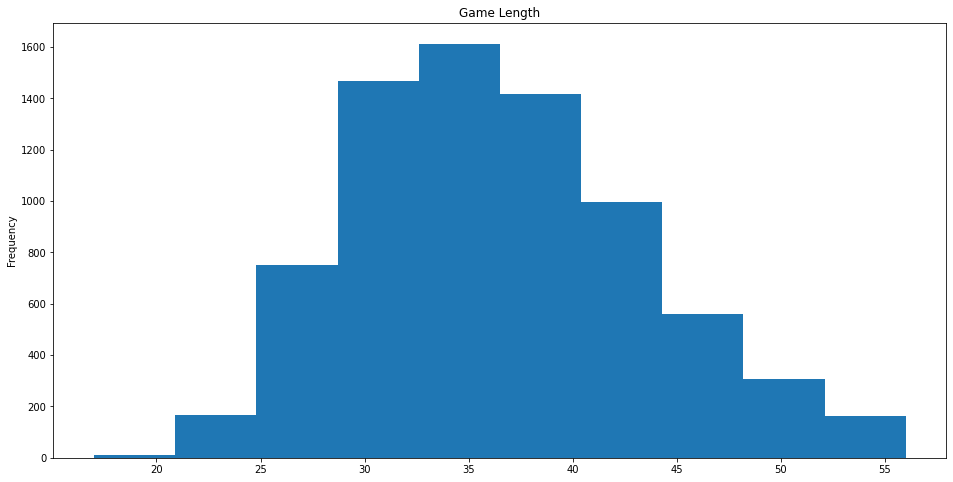

In [42]:
# Displays the cleaned values of game-length as a histogram.
plt.figure('gamelength', figsize=(16,8))
plt.title('Game Length')
primary_df['gamelength'].plot(kind='hist')

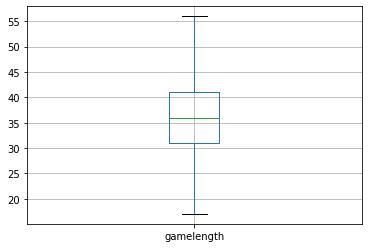

In [43]:
boxplot = primary_df.boxplot(column=["gamelength"])

<AxesSubplot:title={'center':'Year'}, ylabel='Frequency'>

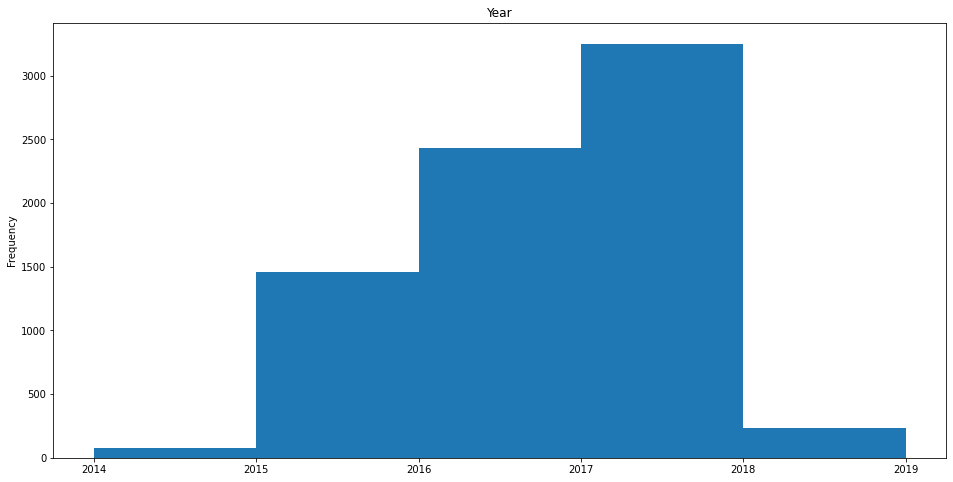

In [44]:
# Displays the cleaned values of the years the matches take place as a histogram.
plt.figure('Year', figsize=(16,8))
plt.title('Year')
primary_df['Year'].plot(kind='hist', bins=[2014,2015,2016,2017,2018,2019])